In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task2_22f.csv')

In [3]:
cat_features = ['target_class']

In [4]:
X = df.drop(['target_class'], axis=1, errors='ignore')

In [5]:
y = df['target_class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = CatBoostClassifier(random_state=42,
                           cat_features=[],
                           thread_count=-1
                           )

In [8]:
model.fit(X_train, 
          y_train, 
          eval_set=(X_test, y_test), 
          verbose=100, 
          plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.8015466	test: 1.7896025	best: 1.7896025 (0)	total: 150ms	remaining: 2m 30s
100:	learn: 0.2283558	test: 0.3434932	best: 0.3425657 (98)	total: 1.22s	remaining: 10.9s
200:	learn: 0.1500484	test: 0.3257034	best: 0.3257034 (200)	total: 2.21s	remaining: 8.8s
300:	learn: 0.1062330	test: 0.3211550	best: 0.3208359 (296)	total: 3.28s	remaining: 7.61s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.3208359379
bestIteration = 296

Shrink model to first 297 iterations.


In [9]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,feature_1,27.730190
1,feature_13,25.577818
2,target_reg,18.129179
3,feature_15,11.260510
4,feature_2,2.576410
5,feature_4,2.273749
6,feature_19,2.145992
7,feature_6,1.781104
8,feature_7,1.712060
9,feature_11,1.384411


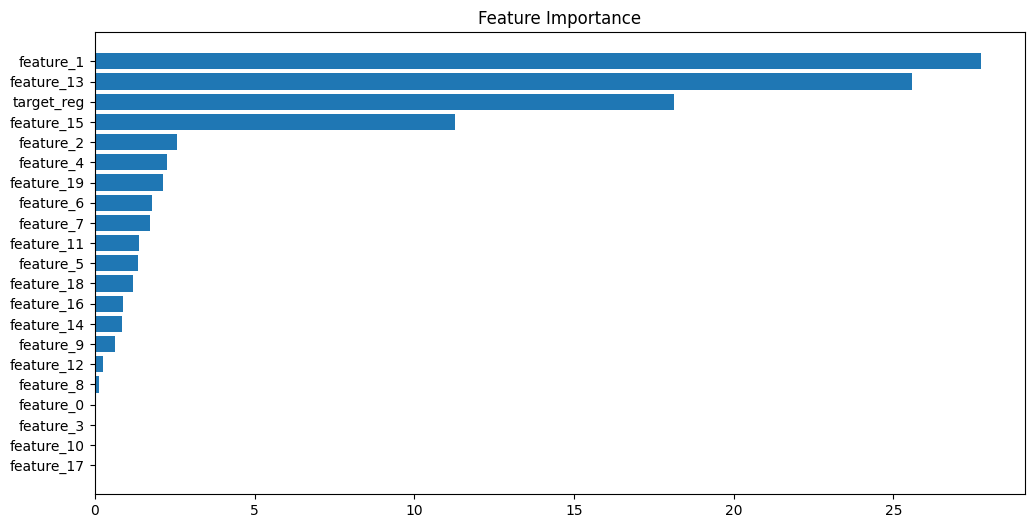

In [10]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Feature Importance');

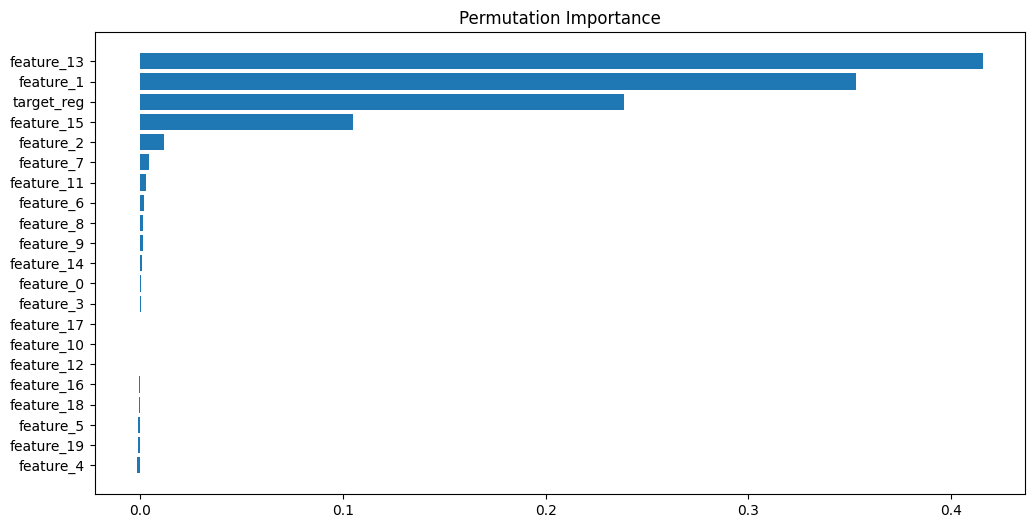

In [11]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=1066)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [13]:
from sklearn.metrics import classification_report

In [14]:
y_pred = model.predict(X_test)

In [18]:
cr = classification_report(y_true=y_test,
                      y_pred=y_pred,
                      target_names=model.classes_)

In [19]:
print(cr)

                 precision    recall  f1-score   support

    another_bug       0.96      0.92      0.94        52
      break_bug       1.00      1.00      1.00        49
    electro_bug       1.00      1.00      1.00        33
   engine_check       0.86      0.91      0.89        34
    engine_fuel       0.87      0.72      0.79        47
engine_ignition       0.80      0.86      0.83        50
engine_overheat       0.72      0.79      0.76        53
     gear_stick       0.97      0.87      0.92        38
    wheel_shake       0.76      0.89      0.82        18

       accuracy                           0.88       374
      macro avg       0.88      0.89      0.88       374
   weighted avg       0.88      0.88      0.88       374

